# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

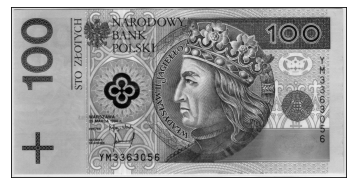

In [11]:
if not os.path.exists("100zloty.jpg"):
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg

I = cv2.imread('100zloty.jpg')
I = cv2.cvtColor(I, cv2.COLOR_RGB2GRAY)

plt.imshow(I)
plt.gray()
plt.xticks([]), plt.yticks([])
plt.show()

In [14]:
# conversion to binary arrays
Ibits = [[list('{0:00b}'.format(y).rjust(8, '0')) for y in x] for x in I]

In [16]:
imgs = []
for x in Ibits[0][0]:
    imgs.append(I.copy())

In [17]:
for i in range(len(imgs)):
    for x in range(len(imgs[i])):
        for y in range(len(imgs[i][x])):
            imgs[i][x][y] = int(Ibits[x][y][i]) * 255 # pow(2, i+1)

# Rozkład na płaszczyzny bitowe

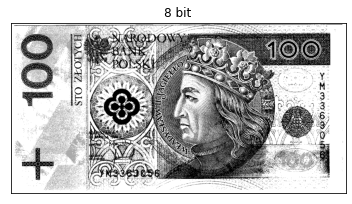

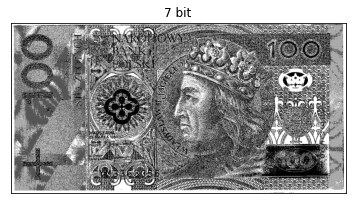

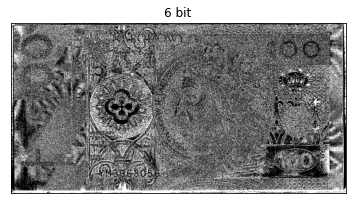

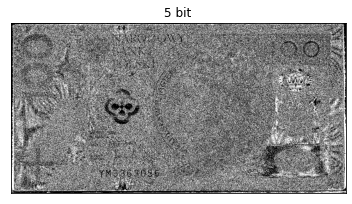

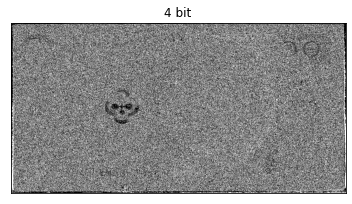

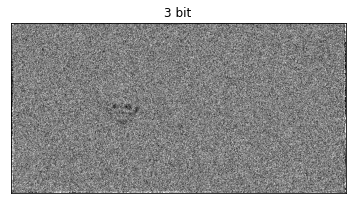

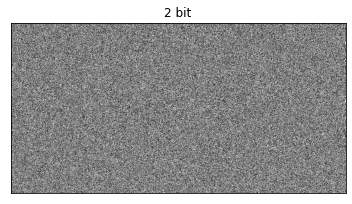

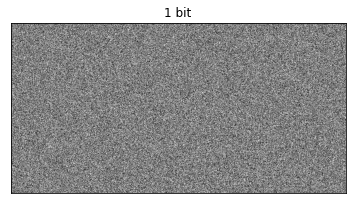

In [27]:
for i in range(len(imgs)):
    plt.imshow(imgs[i])
    plt.title(str(8-i)+' bit')
    plt.xticks([]), plt.yticks([])
    plt.show()
    

# Rekonstrukcja z płaszczyzn

In [20]:
im = I.copy()

im2 = [[
    imgs[0][x][y]* 128 + 
    imgs[1][x][y] * 64 
    for y in range(len(I[x]))] for x in range(len(I))]


im3 = [[
    imgs[0][x][y]* 128 + 
    imgs[1][x][y] * 64 + 
    imgs[2][x][y] * 32 
    for y in range(len(I[x]))] for x in range(len(I))]

im4 = [[
    imgs[0][x][y]* 128 + 
    imgs[1][x][y] * 64 + 
    imgs[2][x][y] * 32 + 
    imgs[3][x][y] * 16 
    for y in range(len(I[x]))] for x in range(len(I))]

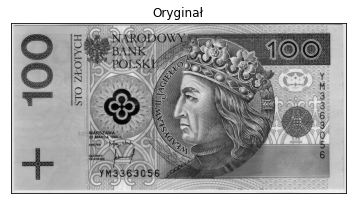

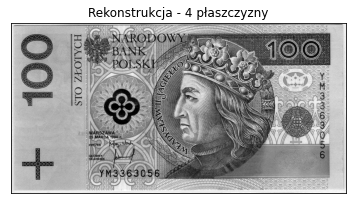

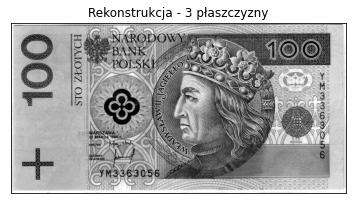

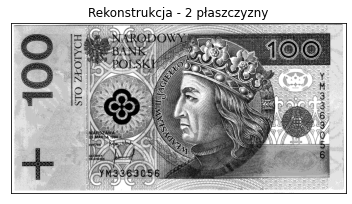

In [23]:
plt.imshow(im)
plt.xticks([]), plt.yticks([])
plt.title("Oryginał")
plt.show()

plt.imshow(im4)
plt.xticks([]), plt.yticks([])
plt.title("Rekonstrukcja - 4 płaszczyzny")
plt.show()

plt.imshow(im3)
plt.xticks([]), plt.yticks([])
plt.title("Rekonstrukcja - 3 płaszczyzny")
plt.show()

plt.imshow(im2)
plt.xticks([]), plt.yticks([])
plt.title("Rekonstrukcja - 2 płaszczyzny")
plt.show()